In [1]:
# Libraries Used in this project:

import pandas as pd
import numpy as np
from datetime import datetime, date

In [2]:
## Google Drive Conection:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### This project uses data from https://drive.google.com/file/d/1CuE9I4x0_Agm2BMkWfnSSbiGm0-pTDuc/view?usp=sharing about NYC metro database

##### **Field Description** :

##### CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS

##### CA = Control Area (A002) 
##### UNIT = Remote Unit for a station (R051) 
##### SCP = Subunit Channel Position represents an specific address for a device (02-00-00) 
##### STATION = Represents the station name the device is located at 
##### LINENAME = Represents all train lines that can be boarded at this station Normally lines are represented by one character. LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains. 
##### DIVISION = Represents the Line originally the station belonged to BMT, IRT, or IND
##### DATE = Represents the date (MM-DD-YY) 
##### TIME = Represents the time (hhmmss) for a scheduled audit event 
##### DESc = Represent the REGULAR scheduled audit event (Normally occurs every 4 hours) 1. Audits may occur more that 4 hours due to planning, or troubleshooting activities. 2. Additionally, there may be a RECOVR AUD entry This refers to a missed audit that was recovered. 
##### ENTRIES = The comulative entry register value for a device 
##### EXIST = The cumulative exit register value for a device

#### Read Databases from Google Drive and analyse their size (rows and columns with shape function): ✍

##### Lets start with the first dataset and do the same for others: ©

In [3]:
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2010.csv.gz"
bd2010 = pd.read_csv(path)
# 7.420.384 registers
bd2010.shape

(7420384, 10)

##### Confirm columns from challenge description: ✅

In [4]:
bd2010.head(1)

,time,ca,unit,scp,station,linename,division,desc,entries,exits
0,2010-04-17 04:00:00,A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,2704717.0,928793.0


##### OBS: We receive Date and Time in the same column

###### Data Wrangling : Strip Date information from 'time' column (with datetime function) ⏰

In [5]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2010['date'] = pd.to_datetime(bd2010['time']).dt.date
bd2010['date'] = pd.to_datetime(bd2010['date'])
bd2010['TimeUnit']=bd2010['date'].dt.to_period('M')
bd2010.head(1)

,time,ca,unit,scp,station,linename,division,desc,entries,exits,date,TimeUnit
0,2010-04-17 04:00:00,A002,R051,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,2704717.0,928793.0,2010-04-17,2010-04


###### Data Wrangling : Group Time Series data in that time unit

In [6]:
#We just have data since 2010-04 :
bd2010_count = bd2010.groupby(bd2010.TimeUnit).size().reset_index(name='count')
print (bd2010_count)

  TimeUnit   count
0  2010-04  237015
1  2010-05  740309
2  2010-06  921108
3  2010-07  923053
4  2010-08  913255
5  2010-09  915056
6  2010-10  959196
7  2010-11  881860
8  2010-12  929532


In [7]:
#lets analyse in % and we will see less information in 2010-04 and 2010-05 :
bd2010.TimeUnit.value_counts(normalize=True)

2010-10    0.129265
2010-12    0.125267
2010-07    0.124394
2010-06    0.124132
2010-09    0.123317
2010-08    0.123074
2010-11    0.118843
2010-05    0.099767
2010-04    0.031941
Freq: M, Name: TimeUnit, dtype: float64

In [8]:
del bd2010_count

<div>

##### Lets analyse the last Dataframe

In [9]:
# 2017
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2017.csv.gz"
bd2017 = pd.read_csv(path)
# 7.466.025 registers
bd2017.shape

(7466025, 10)

In [10]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2017['date'] = pd.to_datetime(bd2017['time']).dt.date
bd2017['date'] = pd.to_datetime(bd2017['date'])
bd2017['TimeUnit']=bd2017['date'].dt.to_period('M')
#We have data from 2017-01 to 2017-09 :
bd2017_count = bd2017.groupby(bd2017.TimeUnit).size().reset_index(name='count')
print (bd2017_count)

  TimeUnit   count
0  2017-01  860221
1  2017-02  785110
2  2017-03  872898
3  2017-04  850870
4  2017-05  868706
5  2017-06  845608
6  2017-07  874964
7  2017-08  880515
8  2017-09  627133


In [11]:
del bd2017_count

<div>

##### Before group information in all dataframes, lets do it in this two ones: ⚡

##### Decision of modelling entries information - Lets group this variable by TimeUnit :

2010

In [12]:
#### Resume data by TimeUnit and entries:
bd2010_count = bd2010.groupby(['TimeUnit'])['entries'].agg(['count','mean'])
bd2010_count.reset_index(inplace=True)
bd2010_count.columns=['TimeUnit','Volume','entries']
bd2010_count['TimeUnit']=bd2010_count['TimeUnit']
bd2010_count['Volume (%)']=bd2010_count['Volume']/bd2010_count['Volume'].sum()
bd2010_count

,TimeUnit,Volume,entries,Volume (%)
0,2010-04,237015,2.974501e+06,0.031941
1,2010-05,740309,2.848986e+06,0.099767
2,2010-06,921108,2.827502e+06,0.124132
3,2010-07,923053,2.918731e+06,0.124394
4,2010-08,913255,2.919157e+06,0.123074
5,2010-09,915056,2.909908e+06,0.123317
6,2010-10,959196,3.031963e+06,0.129265
7,2010-11,881860,2.990538e+06,0.118843
8,2010-12,929532,3.024978e+06,0.125267


In [13]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2010_count = bd2010.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2010_count.reset_index(inplace=True)
bd2010_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2010_count['TimeUnit']=bd2010_count['TimeUnit']
bd2010_count['ca']=bd2010_count['ca']
bd2010_count['scp']=bd2010_count['scp']
bd2010_count['station']=bd2010_count['station']
bd2010_count['linename']=bd2010_count['linename']
bd2010_count['division']=bd2010_count['division']
bd2010_count['desc']=bd2010_count['desc']
bd2010_count['Volume (%)']=bd2010_count['Volume']/bd2010_count['Volume'].sum()
bd2010_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR,3,2.708107e+06,4.048454e-07
1,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,OPEN,2,2.707296e+06,2.698969e-07
2,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,40,2.708015e+06,5.397939e-06
3,2010-04,A002,02-00-01,LEXINGTON AVE,456NQR,BMT,REGULAR,42,2.700607e+06,5.667836e-06
4,2010-04,A002,02-03-00,LEXINGTON AVE,456NQR,BMT,REGULAR,42,1.128957e+06,5.667836e-06
...,...,...,...,...,...,...,...,...,...,...
171456,2010-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,RECOVR,19,1.421053e+01,2.564021e-06
171457,2010-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,167,1.303593e+01,2.253639e-05
171458,2010-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,AUD,17,5.554000e+03,2.294124e-06
171459,2010-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,RECOVR,17,5.554000e+03,2.294124e-06


2017

In [14]:
#### Resume data by TimeUnit and entries:
bd2017_count = bd2017.groupby(['TimeUnit'])['entries'].agg(['count','mean'])
bd2017_count.reset_index(inplace=True)
bd2017_count.columns=['TimeUnit','Volume','entries']
bd2017_count['TimeUnit']=bd2017_count['TimeUnit']
bd2017_count['Volume (%)']=bd2017_count['Volume']/bd2017_count['Volume'].sum()
bd2017_count

,TimeUnit,Volume,entries,Volume (%)
0,2017-01,860221,3.594338e+07,0.115218
1,2017-02,785110,3.645874e+07,0.105158
2,2017-03,872898,3.614010e+07,0.116916
3,2017-04,850870,3.672926e+07,0.113966
4,2017-05,868706,3.806798e+07,0.116355
5,2017-06,845608,3.850041e+07,0.113261
6,2017-07,874964,3.923205e+07,0.117193
7,2017-08,880515,3.951079e+07,0.117936
8,2017-09,627133,3.964012e+07,0.083998


In [15]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2017_count = bd2017.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2017_count.reset_index(inplace=True)
bd2017_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2017_count['TimeUnit']=bd2017_count['TimeUnit']
bd2017_count['ca']=bd2017_count['ca']
bd2017_count['scp']=bd2017_count['scp']
bd2017_count['station']=bd2017_count['station']
bd2017_count['linename']=bd2017_count['linename']
bd2017_count['division']=bd2017_count['division']
bd2017_count['desc']=bd2017_count['desc']
bd2017_count['Volume (%)']=bd2017_count['Volume']/bd2017_count['Volume'].sum()
bd2017_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2017-01,A002,02-00-00,59 ST,NQR456W,BMT,REGULAR,185,6.011633e+06,2.477892e-05
1,2017-01,A002,02-00-01,59 ST,NQR456W,BMT,REGULAR,186,5.491330e+06,2.491286e-05
2,2017-01,A002,02-03-00,59 ST,NQR456W,BMT,REGULAR,186,8.503033e+05,2.491286e-05
3,2017-01,A002,02-03-01,59 ST,NQR456W,BMT,REGULAR,185,1.409304e+05,2.477892e-05
4,2017-01,A002,02-03-02,59 ST,NQR456W,BMT,REGULAR,185,5.226530e+06,2.477892e-05
...,...,...,...,...,...,...,...,...,...,...
54429,2017-09,TRAM2,00-00-01,RIT-ROOSEVELT,R,RIT,REGULAR,136,2.385240e+06,1.821585e-05
54430,2017-09,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,RECOVR AUD,2,2.742000e+03,2.678802e-07
54431,2017-09,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,50,2.742000e+03,6.697004e-06
54432,2017-09,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,RECOVR AUD,2,5.554000e+03,2.678802e-07


##### Decision : We will use 2017 and 2010 as Out of Time Data, because they dont have all months avaliable for modelling

##### Decision : Dont model 'entries' with 'exist' as predictive variable to avoid correlation problems

In [16]:
del bd2010 , bd2017

##### Now lets analyse other Dataframes: ⚡

2011

In [17]:
# 2011
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2011.csv.gz"
bd2011 = pd.read_csv(path)
# 11.146.415 registers
bd2011.shape

(11146415, 10)

In [18]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2011['date'] = pd.to_datetime(bd2011['time']).dt.date
bd2011['date'] = pd.to_datetime(bd2011['date'])
bd2011['TimeUnit']=bd2011['date'].dt.to_period('M')
#We have data in all months of 2011 :
bd2011_count = bd2011.groupby(bd2011.TimeUnit).size().reset_index(name='count')
print (bd2011_count)

   TimeUnit   count
0   2011-01  932427
1   2011-02  827511
2   2011-03  931305
3   2011-04  926277
4   2011-05  945542
5   2011-06  926306
6   2011-07  961642
7   2011-08  951212
8   2011-09  936834
9   2011-10  961435
10  2011-11  905689
11  2011-12  940235


In [19]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2011_count = bd2011.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2011_count.reset_index(inplace=True)
bd2011_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2011_count['TimeUnit']=bd2011_count['TimeUnit']
bd2011_count['ca']=bd2011_count['ca']
bd2011_count['scp']=bd2011_count['scp']
bd2011_count['station']=bd2011_count['station']
bd2011_count['linename']=bd2011_count['linename']
bd2011_count['division']=bd2011_count['division']
bd2011_count['desc']=bd2011_count['desc']
bd2011_count['Volume (%)']=bd2011_count['Volume']/bd2011_count['Volume'].sum()
bd2011_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2011-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR,14,3.014034e+06,1.258096e-06
1,2011-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,OPEN,13,3.015116e+06,1.168232e-06
2,2011-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,184,3.010432e+06,1.653497e-05
3,2011-01,A002,02-00-01,LEXINGTON AVE,456NQR,BMT,DOOR,13,2.975435e+06,1.168232e-06
4,2011-01,A002,02-00-01,LEXINGTON AVE,456NQR,BMT,OPEN,12,2.976283e+06,1.078368e-06
...,...,...,...,...,...,...,...,...,...,...
241387,2011-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,AUD,17,5.554000e+03,1.527687e-06
241388,2011-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,DOOR,3,5.554000e+03,2.695919e-07
241389,2011-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,OPEN,3,5.554000e+03,2.695919e-07
241390,2011-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,RECOVR,17,5.554000e+03,1.527687e-06


In [20]:
del bd2011

<div>

2012

In [21]:
# 2012
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2012.csv.gz"
bd2012 = pd.read_csv(path)
# 11.080.243 registers
bd2012.shape

(11080243, 10)

In [23]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2012['date'] = pd.to_datetime(bd2012['time']).dt.date
bd2012['date'] = pd.to_datetime(bd2012['date'])
bd2012['TimeUnit']=bd2012['date'].dt.to_period('M')
#We have data in all months of 2012 :
bd2012_count = bd2012.groupby(bd2012.TimeUnit).size().reset_index(name='count')
print (bd2012_count)

   TimeUnit    count
0   2012-01   912896
1   2012-02   863919
2   2012-03   954575
3   2012-04  1004669
4   2012-05   949446
5   2012-06   899683
6   2012-07   948078
7   2012-08   950077
8   2012-09   904349
9   2012-10   934235
10  2012-11   842555
11  2012-12   915761


In [24]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2012_count = bd2012.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2012_count.reset_index(inplace=True)
bd2012_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2012_count['TimeUnit']=bd2012_count['TimeUnit']
bd2012_count['ca']=bd2012_count['ca']
bd2012_count['scp']=bd2012_count['scp']
bd2012_count['station']=bd2012_count['station']
bd2012_count['linename']=bd2012_count['linename']
bd2012_count['division']=bd2012_count['division']
bd2012_count['desc']=bd2012_count['desc']
bd2012_count['Volume (%)']=bd2012_count['Volume']/bd2012_count['Volume'].sum()
bd2012_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2012-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR,3,3.467280e+06,2.726538e-07
1,2012-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,OPEN,2,3.464843e+06,1.817692e-07
2,2012-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,188,3.475472e+06,1.708631e-05
3,2012-01,A002,02-00-01,LEXINGTON AVE,456NQR,BMT,DOOR,10,3.378124e+06,9.088460e-07
4,2012-01,A002,02-00-01,LEXINGTON AVE,456NQR,BMT,OPEN,8,3.377946e+06,7.270768e-07
...,...,...,...,...,...,...,...,...,...,...
204565,2012-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,DOOR OPEN,6,5.554000e+03,5.453076e-07
204566,2012-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,LGF-MAN,3,5.554000e+03,2.726538e-07
204567,2012-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,LOGON,3,5.554000e+03,2.726538e-07
204568,2012-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,RECOVR AUD,15,5.554000e+03,1.363269e-06


In [25]:
del bd2012

<div>

2013

In [26]:
# 2013
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2013.csv.gz"
bd2013 = pd.read_csv(path)
# 11.498.067 registers
bd2013.shape

(11498067, 10)

In [27]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2013['date'] = pd.to_datetime(bd2013['time']).dt.date
bd2013['date'] = pd.to_datetime(bd2013['date'])
bd2013['TimeUnit']=bd2013['date'].dt.to_period('M')
#We have data in all months of 2012 :
bd2013_count = bd2013.groupby(bd2013.TimeUnit).size().reset_index(name='count')
print (bd2013_count)

   TimeUnit    count
0   2013-01   953517
1   2013-02   892061
2   2013-03   988158
3   2013-04   951634
4   2013-05  1023177
5   2013-06   949509
6   2013-07   970908
7   2013-08   959727
8   2013-09   949087
9   2013-10   981364
10  2013-11   929878
11  2013-12   949047


In [28]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2013_count = bd2013.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2013_count.reset_index(inplace=True)
bd2013_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2013_count['TimeUnit']=bd2013_count['TimeUnit']
bd2013_count['ca']=bd2013_count['ca']
bd2013_count['scp']=bd2013_count['scp']
bd2013_count['station']=bd2013_count['station']
bd2013_count['linename']=bd2013_count['linename']
bd2013_count['division']=bd2013_count['division']
bd2013_count['desc']=bd2013_count['desc']
bd2013_count['Volume (%)']=bd2013_count['Volume']/bd2013_count['Volume'].sum()
bd2013_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2013-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR CLOSE,8,3.949566e+06,7.084291e-07
1,2013-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR OPEN,15,3.946717e+06,1.328305e-06
2,2013-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,LGF-MAN,6,3.948252e+06,5.313218e-07
3,2013-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,LOGON,6,3.948252e+06,5.313218e-07
4,2013-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,190,3.952611e+06,1.682519e-05
...,...,...,...,...,...,...,...,...,...,...
260481,2013-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,188,1.242590e+03,1.664808e-05
260482,2013-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,DOOR CLOSE,1,5.554000e+03,8.855364e-08
260483,2013-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,DOOR OPEN,1,5.554000e+03,8.855364e-08
260484,2013-12,TRAM2,00-05-01,RIT-ROOSEVELT,R,RIT,RECOVR AUD,17,5.554000e+03,1.505412e-06


In [29]:
del bd2013

<div>

2014

In [30]:
# 2014
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2014.csv.gz"
bd2014 = pd.read_csv(path)
# 10.811.952 registers
bd2014.shape

(10811952, 10)

In [31]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2014['date'] = pd.to_datetime(bd2014['time']).dt.date
bd2014['date'] = pd.to_datetime(bd2014['date'])
bd2014['TimeUnit']=bd2014['date'].dt.to_period('M')
#We have data in all months of 2014 :
bd2014_count = bd2014.groupby(bd2014.TimeUnit).size().reset_index(name='count')
print (bd2014_count)

   TimeUnit   count
0   2014-01  958650
1   2014-02  862425
2   2014-03  959007
3   2014-04  943245
4   2014-05  960230
5   2014-06  930798
6   2014-07  958179
7   2014-08  971095
8   2014-09  946343
9   2014-10  888773
10  2014-11  662333
11  2014-12  770874


In [32]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2014_count = bd2014.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2014_count.reset_index(inplace=True)
bd2014_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2014_count['TimeUnit']=bd2014_count['TimeUnit']
bd2014_count['ca']=bd2014_count['ca']
bd2014_count['scp']=bd2014_count['scp']
bd2014_count['station']=bd2014_count['station']
bd2014_count['linename']=bd2014_count['linename']
bd2014_count['division']=bd2014_count['division']
bd2014_count['desc']=bd2014_count['desc']
bd2014_count['Volume (%)']=bd2014_count['Volume']/bd2014_count['Volume'].sum()
bd2014_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2014-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR CLOSE,3,4.439974e+06,2.816527e-07
1,2014-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR OPEN,8,4.442862e+06,7.510738e-07
2,2014-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,LGF-MAN,2,4.451528e+06,1.877685e-07
3,2014-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,LOGON,2,4.451528e+06,1.877685e-07
4,2014-01,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,REGULAR,186,4.447804e+06,1.746247e-05
...,...,...,...,...,...,...,...,...,...,...
226709,2014-12,TRAM2,00-00-01,RIT-ROOSEVELT,R,RIT,REGULAR,155,8.106473e+05,1.455206e-05
226710,2014-12,TRAM2,00-03-00,RIT-ROOSEVELT,R,RIT,REGULAR,155,1.844835e+05,1.455206e-05
226711,2014-12,TRAM2,00-03-01,RIT-ROOSEVELT,R,RIT,REGULAR,155,2.477725e+06,1.455206e-05
226712,2014-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,155,1.656090e+03,1.455206e-05


In [33]:
del bd2014

<div>

2015

In [34]:
# 2015
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2015.csv.gz"
bd2015 = pd.read_csv(path)
# 10.055.314 registers
bd2015.shape

(10055314, 10)

In [35]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2015['date'] = pd.to_datetime(bd2015['time']).dt.date
bd2015['date'] = pd.to_datetime(bd2015['date'])
bd2015['TimeUnit']=bd2015['date'].dt.to_period('M')
#We have data in all months of 2015 :
bd2015_count = bd2015.groupby(bd2015.TimeUnit).size().reset_index(name='count')
print (bd2015_count)

   TimeUnit   count
0   2015-01  865561
1   2015-02  768919
2   2015-03  849451
3   2015-04  822170
4   2015-05  850325
5   2015-06  823706
6   2015-07  850344
7   2015-08  850012
8   2015-09  833702
9   2015-10  856406
10  2015-11  827734
11  2015-12  856984


In [36]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2015_count = bd2015.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2015_count.reset_index(inplace=True)
bd2015_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2015_count['TimeUnit']=bd2015_count['TimeUnit']
bd2015_count['ca']=bd2015_count['ca']
bd2015_count['scp']=bd2015_count['scp']
bd2015_count['station']=bd2015_count['station']
bd2015_count['linename']=bd2015_count['linename']
bd2015_count['division']=bd2015_count['division']
bd2015_count['desc']=bd2015_count['desc']
bd2015_count['Volume (%)']=bd2015_count['Volume']/bd2015_count['Volume'].sum()
bd2015_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2015-01,A002,02-00-00,LEXINGTON AVE,NQR456,BMT,REGULAR,192,4.962597e+06,0.000019
1,2015-01,A002,02-00-01,LEXINGTON AVE,NQR456,BMT,REGULAR,192,4.610435e+06,0.000019
2,2015-01,A002,02-03-00,LEXINGTON AVE,NQR456,BMT,REGULAR,192,4.329425e+05,0.000019
3,2015-01,A002,02-03-01,LEXINGTON AVE,NQR456,BMT,REGULAR,192,4.552365e+06,0.000019
4,2015-01,A002,02-03-02,LEXINGTON AVE,NQR456,BMT,REGULAR,192,4.286137e+06,0.000019
...,...,...,...,...,...,...,...,...,...,...
70458,2015-12,TRAM2,00-00-01,RIT-ROOSEVELT,R,RIT,REGULAR,185,1.394184e+06,0.000018
70459,2015-12,TRAM2,00-03-00,RIT-ROOSEVELT,R,RIT,REGULAR,185,2.705044e+05,0.000018
70460,2015-12,TRAM2,00-03-01,RIT-ROOSEVELT,R,RIT,REGULAR,185,2.580893e+06,0.000018
70461,2015-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,185,2.037773e+03,0.000018


In [37]:
del bd2015

<div>

2016

In [38]:
# 2016
path = "/content/drive/MyDrive/dados_desafio.zip (Unzipped Files)/2016.csv.gz"
bd2016 = pd.read_csv(path)
# 10.130.791 registers
bd2016.shape

(10130791, 10)

In [39]:
# Decision about TimeSeries : To define a time unit, Let´s Work just with date information (without hour information)
bd2016['date'] = pd.to_datetime(bd2016['time']).dt.date
bd2016['date'] = pd.to_datetime(bd2016['date'])
bd2016['TimeUnit']=bd2016['date'].dt.to_period('M')
#We have data in all months of 2016 :
bd2016_count = bd2016.groupby(bd2016.TimeUnit).size().reset_index(name='count')
print (bd2016_count)

   TimeUnit   count
0   2016-01  861742
1   2016-02  817131
2   2016-03  862350
3   2016-04  830484
4   2016-05  860978
5   2016-06  832063
6   2016-07  853847
7   2016-08  851827
8   2016-09  829751
9   2016-10  851785
10  2016-11  823309
11  2016-12  855524


In [40]:
##### For modelling lets consider this dataset , with other predictive variables:
bd2016_count = bd2016.groupby(['TimeUnit','ca','scp','station','linename','division','desc'])['entries'].agg(['count','mean'])
bd2016_count.reset_index(inplace=True)
bd2016_count.columns=['TimeUnit','ca','scp','station','linename','division','desc','Volume','entries']
bd2016_count['TimeUnit']=bd2016_count['TimeUnit']
bd2016_count['ca']=bd2016_count['ca']
bd2016_count['scp']=bd2016_count['scp']
bd2016_count['station']=bd2016_count['station']
bd2016_count['linename']=bd2016_count['linename']
bd2016_count['division']=bd2016_count['division']
bd2016_count['desc']=bd2016_count['desc']
bd2016_count['Volume (%)']=bd2016_count['Volume']/bd2016_count['Volume'].sum()
bd2016_count

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,2016-01,A002,02-00-00,59 ST,NQR456,BMT,REGULAR,186,5.498729e+06,0.000018
1,2016-01,A002,02-00-01,59 ST,NQR456,BMT,REGULAR,186,5.061326e+06,0.000018
2,2016-01,A002,02-03-00,59 ST,NQR456,BMT,REGULAR,186,6.317967e+05,0.000018
3,2016-01,A002,02-03-01,59 ST,NQR456,BMT,REGULAR,186,5.024039e+06,0.000018
4,2016-01,A002,02-03-02,59 ST,NQR456,BMT,REGULAR,185,4.751582e+06,0.000018
...,...,...,...,...,...,...,...,...,...,...
72647,2016-12,TRAM2,00-00-01,RIT-ROOSEVELT,R,RIT,REGULAR,186,1.995655e+06,0.000018
72648,2016-12,TRAM2,00-03-00,RIT-ROOSEVELT,R,RIT,REGULAR,186,3.720019e+05,0.000018
72649,2016-12,TRAM2,00-03-01,RIT-ROOSEVELT,R,RIT,REGULAR,186,2.702150e+06,0.000018
72650,2016-12,TRAM2,00-05-00,RIT-ROOSEVELT,R,RIT,REGULAR,186,2.478231e+03,0.000018


In [41]:
del bd2016

<div>

##### To work with one database, lets append the grouped information:

In [42]:
data = bd2011_count
data = data.append(bd2012_count)
data = data.append(bd2013_count)
data = data.append(bd2014_count)
data = data.append(bd2015_count)
data = data.append(bd2016_count)
data.shape

(1076277, 10)

##### Lets append OOT data too:

In [44]:
oot_data = bd2010_count.append(bd2017_count)
oot_data.shape

(225895, 10)

In [45]:
del bd2010_count,bd2011_count,bd2012_count,bd2013_count,bd2014_count,bd2015_count,bd2016_count,bd2017_count

<div>

#### Lets analyse how response and continuous variable are distributed in data:

entries


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


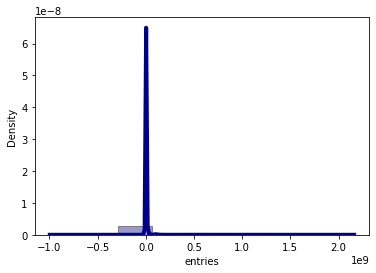

In [46]:
import seaborn as sns
print("entries")
sns.distplot(data['entries'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#### We should not model with negative or zero inflated entries, lets delete this cases:

In [47]:
#Lets see negatives:
data_negative_entries=data.query('entries<0')
data_negative_entries

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
6659,2013-01,N182,00-03-01,HOWARD BCH-JFK,A,IND,DOOR CLOSE,5,-6.780355e+08,4.427682e-07
6660,2013-01,N182,00-03-01,HOWARD BCH-JFK,A,IND,DOOR OPEN,5,-6.780355e+08,4.427682e-07
6661,2013-01,N182,00-03-01,HOWARD BCH-JFK,A,IND,RECOVR AUD,6,-6.780272e+08,5.313218e-07
6662,2013-01,N182,00-03-01,HOWARD BCH-JFK,A,IND,REGULAR,74,-6.780261e+08,6.552969e-06
26598,2013-02,N182,00-03-01,HOWARD BCH-JFK,A,IND,DOOR CLOSE,6,-6.779727e+08,5.313218e-07
...,...,...,...,...,...,...,...,...,...,...
214753,2014-10,R610,00-05-01,ATLANTIC AVE,2345BDNQR,IRT,DOOR CLOSE,9,-9.811392e+08,8.449581e-07
214754,2014-10,R610,00-05-01,ATLANTIC AVE,2345BDNQR,IRT,DOOR OPEN,9,-9.811392e+08,8.449581e-07
214755,2014-10,R610,00-05-01,ATLANTIC AVE,2345BDNQR,IRT,LGF-MAN,2,-9.811392e+08,1.877685e-07
214756,2014-10,R610,00-05-01,ATLANTIC AVE,2345BDNQR,IRT,LOGON,7,-9.811392e+08,6.571896e-07


In [48]:
# filtering negatives and zero cases of entries:
data=data.query('entries>0')
data.shape

(1055455, 10)

entries concentrated in lower values


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


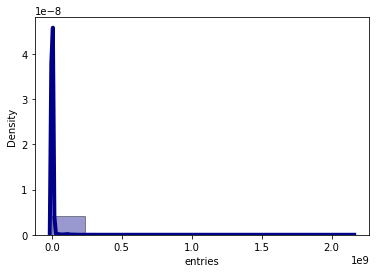

In [49]:
print("entries concentrated in lower values")
sns.distplot(data['entries'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [50]:
#### Analysing mean of entries by TimeUnit
for i in sorted(data.TimeUnit.unique()) :
    print (i)
    print(f'{data[(data.entries > 0) & (data.TimeUnit == i)].entries.mean()}\n')

2011-01
2968824.14835667

2011-02
2982136.703693809

2011-03
3061715.3203901765

2011-04
3087657.0003099246

2011-05
3082938.889045186

2011-06
3129061.163578694

2011-07
3107492.0215057996

2011-08
3097530.904264128

2011-09
3138423.1803918732

2011-10
3156386.4491424607

2011-11
3170881.451738736

2011-12
3053401.783264812

2012-01
3097736.825563033

2012-02
3117697.4525981275

2012-03
3154590.959232475

2012-04
3229686.1197107895

2012-05
3156926.064457356

2012-06
3208467.628488472

2012-07
3222829.25317751

2012-08
3196246.715004178

2012-09
3258380.900763066

2012-10
3393634.5431589824

2012-11
3623861.037843758

2012-12
4172759.248469573

2013-01
4195163.302880007

2013-02
4579827.206214292

2013-03
4604979.101929685

2013-04
4926801.739328853

2013-05
5343572.741253291

2013-06
5671588.41547189

2013-07
5901392.995600781

2013-08
6062238.403237783

2013-09
6027518.894548043

2013-10
5997355.123852627

2013-11
6444303.702818101

2013-12
6480016.461454736

2014-01
6917671.6713030

<div>

##### Lets see the Predictive Vartiables we can use in this project, all them categorical features:

In [ ]:
data.head(1)

In [52]:
data.ca.value_counts(normalize='index')

R610     5.501893e-03
PTH08    4.769507e-03
R238     4.509903e-03
PTH05    4.278723e-03
N324     4.237035e-03
             ...     
PTH22    2.842376e-06
R532G    9.474587e-07
N204     9.474587e-07
A052     9.474587e-07
R146     9.474587e-07
Name: ca, Length: 750, dtype: float64

In [53]:
data.scp.value_counts(normalize='index')

00-00-00    1.068099e-01
00-00-01    1.040366e-01
00-00-02    9.538446e-02
00-00-03    4.512177e-02
01-00-00    3.241256e-02
                ...     
00-A4-03    9.474587e-07
01-A8-01    9.474587e-07
00-00-9A    9.474587e-07
00-06-0C    9.474587e-07
00-50-01    9.474587e-07
Name: scp, Length: 278, dtype: float64

In [54]:
data.station.value_counts(normalize='index')

34 ST-PENN STA     0.023524
FULTON ST          0.013358
42 ST-GRD CNTRL    0.013171
CANAL ST           0.012965
34 ST-HERALD SQ    0.012949
                     ...   
72 ST-2 AVE        0.000016
96 ST-2 AVE        0.000015
86 ST-2 AVE        0.000014
LGA AIRPORT CTB    0.000004
PATH NEW WTC       0.000003
Name: station, Length: 574, dtype: float64

In [55]:
data.linename.value_counts(normalize='index')

1               0.107696
6               0.055291
7               0.043656
F               0.038991
25              0.032019
                  ...   
R1W             0.000043
456LNQRW        0.000034
NQR456W         0.000029
ACENGRS1237W    0.000023
7NQW            0.000023
Name: linename, Length: 129, dtype: float64

In [56]:
data.division.value_counts(normalize='index')

IRT    0.361298
IND    0.356493
BMT    0.223634
PTH    0.050689
SRT    0.005704
RIT    0.002182
Name: division, dtype: float64

In [57]:
data.desc.value_counts(normalize='index')

REGULAR       3.006997e-01
DOOR OPEN     1.153654e-01
RECOVR AUD    1.115443e-01
LOGON         8.512821e-02
DOOR CLOSE    8.227257e-02
LGF-MAN       7.169230e-02
DOOR          6.053787e-02
OPEN          5.985286e-02
RECOVR        4.207475e-02
AUD           4.139542e-02
TS            8.743149e-03
VLT           8.485440e-03
OPN           8.107404e-03
TS VLT OPN    4.019120e-03
CHG           4.168818e-05
BRD           2.937122e-05
TS BRD CHG    2.842376e-06
LGF-SHUTDN    1.894917e-06
B5B6B7B8B9    9.474587e-07
101           9.474587e-07
069           9.474587e-07
064           9.474587e-07
9798999A9B    9.474587e-07
037           9.474587e-07
Name: desc, dtype: float64

<div>

##### Inspiration for this modelling using xgboost can be found here: 
##### https://www.cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost.html
##### https://www.cienciadedatos.net/documentos/py27-time-series-forecasting-python-scikitlearn.html

In [64]:
# Before lets confirm we have already installed forecast library
!pip install skforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 169 kB 35.4 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 100 kB 11.6 MB/s 
     |████████████████████████████████| 308 kB 66.9 MB/s 
     |████████████████████████████████| 11.2 MB 50.4 MB/s 
     |████████████████████████████████| 283 kB 66.5 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 209 kB 75.8 MB/s 
     |████████████████████████████████| 960 kB 66.9 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 147 kB 60.5 MB/s 
     |████████████████████████████████| 112 kB 74.4 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=22a7193

In [62]:
#install boosting for modelling
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.1 MB/s 


In [65]:
#### If we have not imported another library:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.express as px
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [61]:
# Drop '-' from TimeUnit:
data['TimeUnit'] = data['TimeUnit'].astype(str)
data['TimeUnit'] = data['TimeUnit'].str.replace("-","")
data['TimeUnit'] = pd.to_numeric(data['TimeUnit']).astype(int)

In [66]:
data.head(1)

,TimeUnit,ca,scp,station,linename,division,desc,Volume,entries,Volume (%)
0,201101,A002,02-00-00,LEXINGTON AVE,456NQR,BMT,DOOR,14,3.014034e+06,0.000001


##### Train, Validation and Test Split

In [67]:
data = data.set_index('TimeUnit')
data = data.sort_index()

In [69]:
# Split train-val-test
# ==============================================================================
end_train = '201112'
end_validation = '201212'
data_train = data.loc[: end_train, :]
data_val   = data.loc[end_train:end_validation, :]
data_test  = data.loc[end_validation:, :]

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validation : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 201101 --- 201112  (n=236889)
Dates validation : 201112 --- 201212  (n=219044)
Dates test       : 201212 --- 201612  (n=636040)


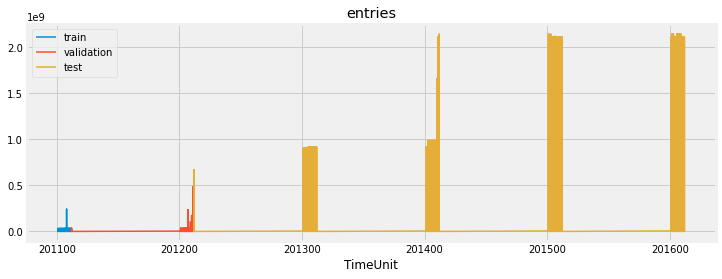

In [70]:
# Plot time series by Databases
# ==============================================================================
fig, ax = plt.subplots(figsize=(11, 4))
data_train['entries'].plot(ax=ax, label='train')
data_val['entries'].plot(ax=ax, label='validation')
data_test['entries'].plot(ax=ax, label='test')
ax.set_title('entries')
ax.legend();

In [71]:
# Store categorical variables as category type
# ==============================================================================
data['ca']      = data['ca'].astype('category')
data['scp']     = data['scp'].astype('category')
data['station'] = data['station'].astype('category')
data['linename']    =  data['linename'].astype('category')
data['division']    =  data['division'].astype('category')
data['desc']    =  data['desc'].astype('category')

##### Create Dummy Variables for Categorical Features

In [72]:
# One hot encoding
# ==============================================================================
data = pd.get_dummies(data, columns=['ca', 'scp', 'station','linename','division','desc'])
data.head(3)

,Volume,entries,Volume (%),ca_A002,ca_A006,ca_A007,ca_A010,ca_A011,ca_A013,ca_A014,...,desc_LOGON,desc_OPEN,desc_OPN,desc_RECOVR,desc_RECOVR AUD,desc_REGULAR,desc_TS,desc_TS BRD CHG,desc_TS VLT OPN,desc_VLT
TimeUnit,,,,,,,,,,,,,,,,,,,,,
201101,14,3.014034e+06,0.000001,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201101,13,3.015116e+06,0.000001,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
201101,184,3.010432e+06,0.000017,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


##### Decision : 'scp', 'station', 'linename' and 'ca' have lot of categories, so we decided remove them from predicted variables

In [73]:
# Select exogenous variables, including those generated by one hot encoding.
exog_variables = [column for column in data.columns
                      if column.startswith(( 'division','desc'))]

print(exog_variables)

['division_BMT', 'division_IND', 'division_IRT', 'division_PTH', 'division_RIT', 'division_SRT', 'desc_037', 'desc_064', 'desc_069', 'desc_101', 'desc_9798999A9B', 'desc_AUD', 'desc_B5B6B7B8B9', 'desc_BRD', 'desc_CHG', 'desc_DOOR', 'desc_DOOR CLOSE', 'desc_DOOR OPEN', 'desc_LGF-MAN', 'desc_LGF-SHUTDN', 'desc_LOGON', 'desc_OPEN', 'desc_OPN', 'desc_RECOVR', 'desc_RECOVR AUD', 'desc_REGULAR', 'desc_TS', 'desc_TS BRD CHG', 'desc_TS VLT OPN', 'desc_VLT']


In [74]:
len(exog_variables)

30

In [75]:
# Since data has been transformed, the train, val and test split is repeated.
data_train = data.loc[: end_train, :]
data_val   = data.loc[end_train:end_validation, :]
data_test  = data.loc[end_validation:, :]

In [76]:
# Create forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = XGBRegressor(random_state=123),
                lags = 24
                )

##### gridserch will find the best parameters in model (number of estimators, max_depth and learning rate from  xgboosting ecision trees)

##### Choose skforecaster for testing more than one model (24 models with 24 lags)

##### OBS: It takes 2h on Google Colab

In [77]:
# Grid search of hyperparameters and lags
# ==============================================================================
# Regressor hyperparameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1]
    }

# Lags used as predictors
lags_grid = [24, [1, 2, 22, 23, 24]]  #,24  

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data.loc[:end_validation, 'entries'],
                        exog               = data.loc[:end_validation, exog_variables],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = 5,
                        refit              = False,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
                        )

Number of models compared: 24.


loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[18:07:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                 | 1/12 [01:42<18:44, 102.23s/it]

[18:09:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████                              | 2/12 [05:54<31:42, 190.20s/it]

[18:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████                           | 3/12 [07:54<23:47, 158.56s/it]

[18:15:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████                        | 4/12 [14:00<32:02, 240.35s/it]

[18:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████                     | 5/12 [17:27<26:38, 228.41s/it]

[18:24:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████                  | 6/12 [30:57<42:36, 426.03s/it]

[18:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████               | 7/12 [32:40<26:42, 320.48s/it]

[18:40:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████            | 8/12 [36:51<19:53, 298.45s/it]

[18:44:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████         | 9/12 [38:57<12:12, 244.26s/it]

[18:46:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|█████████████████████████████▏     | 10/12 [45:19<09:33, 286.81s/it]

[18:52:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|████████████████████████████████   | 11/12 [48:52<04:24, 264.34s/it]

[18:56:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   0%|                                             | 0/12 [00:00<?, ?it/s]

[19:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:   8%|███                                  | 1/12 [01:21<14:51, 81.07s/it]

[19:11:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  17%|██████                              | 2/12 [03:59<21:05, 126.57s/it]

[19:13:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  25%|█████████                           | 3/12 [05:31<16:37, 110.83s/it]

[19:15:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  33%|████████████                        | 4/12 [09:06<20:16, 152.10s/it]

[19:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  42%|███████████████                     | 5/12 [11:18<16:52, 144.58s/it]

[19:21:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  50%|██████████████████                  | 6/12 [18:00<23:12, 232.16s/it]

[19:27:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  58%|█████████████████████               | 7/12 [19:22<15:15, 183.14s/it]

[19:29:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  67%|████████████████████████            | 8/12 [22:02<11:43, 175.85s/it]

[19:31:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  75%|███████████████████████████         | 9/12 [23:37<07:31, 150.48s/it]

[19:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  83%|█████████████████████████████▏     | 10/12 [27:17<05:44, 172.00s/it]

[19:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop param_grid:  92%|████████████████████████████████   | 11/12 [29:26<02:38, 158.79s/it]

[19:39:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



loop lags_grid: 100%|███████████████████████████████████| 2/2 [1:38:17<00:00, 2948.81s/it]


[19:45:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2 22 23 24] 
  Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
  Backtesting metric: 48441045365862.68



In [78]:
# Results grid search (sorted by RMSE)
# ==============================================================================
results_grid.head(10)

,lags,params,mean_squared_error,learning_rate,max_depth,n_estimators
13,"[1, 2, 22, 23, 24]","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",4.844105e+13,0.01,3.0,500.0
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",4.847360e+13,0.01,3.0,500.0
11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",4.874404e+13,0.10,10.0,500.0
10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",4.897196e+13,0.10,10.0,100.0
18,"[1, 2, 22, 23, 24]","{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",4.901235e+13,0.10,3.0,100.0
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",4.901246e+13,0.10,3.0,100.0
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",4.902561e+13,0.01,5.0,500.0
15,"[1, 2, 22, 23, 24]","{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",4.908063e+13,0.01,5.0,500.0
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",4.908695e+13,0.01,10.0,500.0
20,"[1, 2, 22, 23, 24]","{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",4.918033e+13,0.10,5.0,100.0


##### Best model uses lags 1, 2 , 22, 23 e 24, max depht 3, learning rate 0.01 and 500 estimators :

In [80]:
# Backtesting (Teste)
# ==============================================================================
metric, predictions = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = data['entries'],
    exog               = data[exog_variables],
    initial_train_size = len(data.loc[:end_validation]),
    fixed_train_size   = False,
    steps              = 5,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
    )

print(f"Backtest error: {metric}")

[19:49:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:49:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Backtest error: 9760600613697894.0


In [89]:
forecaster

ForecasterAutoreg 
Regressor: XGBRegressor(learning_rate=0.01, n_estimators=500, random_state=123) 
Lags: [ 1  2 22 23 24] 
Transformer for y: None 
Transformer for exog: None 
Window size: 24 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['division_BMT', 'division_IND', 'division_IRT', 'division_PTH', 'division_RIT', 'division_SRT', 'desc_037', 'desc_064', 'desc_069', 'desc_101', 'desc_9798999A9B', 'desc_AUD', 'desc_B5B6B7B8B9', 'desc_BRD', 'desc_CHG', 'desc_DOOR', 'desc_DOOR CLOSE', 'desc_DOOR OPEN', 'desc_LGF-MAN', 'desc_LGF-SHUTDN', 'desc_LOGON', 'desc_OPEN', 'desc_OPN', 'desc_RECOVR', 'desc_RECOVR AUD', 'desc_REGULAR', 'desc_TS', 'desc_TS BRD CHG', 'desc_TS VLT OPN', 'desc_VLT'] 
Training range: [0, 437347] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma'

In [104]:
# Predictions
# ==============================================================================
predictions

,pred
24,663816.500
25,1059795.750
26,1404130.000
27,1696051.875
28,1906423.000
...,...
26,1306810.250
27,1621159.500
28,1906423.000
24,2732717.500


##### Feature Importance (Lags and 30 features created from 2 columns) 
##### We could turn this model into a better one using 

In [81]:
# Extract feature importance
# ==============================================================================
importance = forecaster.get_feature_importance()
importance

,feature,importance
0,lag_1,0.500089
1,lag_2,0.037242
2,lag_22,0.046769
3,lag_23,0.016493
4,lag_24,0.235102
5,division_BMT,0.000000
6,division_IND,0.002138
7,division_IRT,0.000586
8,division_PTH,0.011566
9,division_RIT,0.000000


##### We dont have all division and desc on oot data, so we cant backtest the model there, its another point to become this project better, retraining the model with avaliable features on oot data.

In [116]:
# One hot encoding
# ==============================================================================
oot_data = pd.get_dummies(oot_data, columns=['division','desc'])
oot_data.head(3)

,TimeUnit,ca,scp,station,linename,Volume,entries,Volume (%),division_BMT,division_IND,...,desc_DOOR,desc_LGF-MAN,desc_LOGON,desc_OPEN,desc_OPN,desc_RECOVR,desc_RECOVR AUD,desc_REGULAR,desc_TS,desc_VLT
0,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,3,2.708107e+06,4.048454e-07,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,2,2.707296e+06,2.698969e-07,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2010-04,A002,02-00-00,LEXINGTON AVE,456NQR,40,2.708015e+06,5.397939e-06,1,0,...,0,0,0,0,0,0,0,1,0,0


In [117]:
# Backtesting (OOT)
# ==============================================================================
metric, predictions = backtesting_forecaster(
    forecaster         = forecaster,
    y                  = oot_data['entries'],
    exog               = oot_data[exog_variables],
    #initial_train_size = len(data.loc[:end_validation]),
    #fixed_train_size   = False,
    steps              = 5,
    refit              = False,
    metric             = 'mean_squared_error',
    verbose            = False
    )

print(f"Backtest error: {metric}")

KeyError: ignored